# **Starting with predicting Diabetes**

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "/content/diabetes_prediction_dataset.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Preview the dataset
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age               

In [ ]:
# One-hot encode 'gender' and 'smoking_history'
data = pd.get_dummies(data, columns=['gender', 'smoking_history'], drop_first=True)

# Verify encoding
print(data.head())


    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Male  gender_Other  smoking_history_current  \
0         0        False         False                    False   
1         0        False         False                    False   
2         0         True         False                    False   
3         0        False         False                     True   
4         0         True         False                     True   

   smoking_history_ever  smoking_history_former  smoking_history_never  \
0                 False             

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns to normalize
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# Verify normalization
print(data[num_cols].describe())


                age           bmi   HbA1c_level  blood_glucose_level
count  1.000000e+05  1.000000e+05  1.000000e+05         1.000000e+05
mean   1.447553e-16 -1.729816e-16 -3.410605e-18        -2.786749e-16
std    1.000005e+00  1.000005e+00  1.000005e+00         1.000005e+00
min   -1.856658e+00 -2.608320e+00 -1.893686e+00        -1.426210e+00
25%   -7.943364e-01 -5.561106e-01 -6.794897e-01        -9.349053e-01
50%    4.948073e-02 -1.155837e-04  2.545078e-01         4.770422e-02
75%    8.044750e-01  3.404125e-01  6.281067e-01         5.144437e-01
max    1.692704e+00  1.030161e+01  3.243300e+00         3.978142e+00


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(columns=['diabetes'])  # Features
y = data['diabetes']                # Target

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (80000, 13)
Testing set size: (20000, 13)


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print(f"Class distribution after SMOTE:\n{y_train_smote.value_counts()}")


Class distribution after SMOTE:
diabetes
0    73208
1    73208
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=500, solver='saga', class_weight='balanced')  # 'balanced' adjusts for class imbalance
model.fit(X_train_smote, y_train_smote)


LogisticRegression(class_weight='balanced', max_iter=500, solver='saga')

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob)}")


              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18292
           1       0.43      0.88      0.57      1708

    accuracy                           0.89     20000
   macro avg       0.71      0.89      0.76     20000
weighted avg       0.94      0.89      0.91     20000

AUC-ROC: 0.9618734255540232


Next Approach

In [ ]:
import pandas as pd

# Load the dataset
file_path = "diabetes_prediction_dataset.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# One-hot encode 'gender' and 'smoking_history'
data = pd.get_dummies(data, columns=['gender', 'smoking_history'], drop_first=True)

# Normalize numerical features
from sklearn.preprocessing import StandardScaler

num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# Define features (X) and target (y)
X = data.drop(columns=['diabetes'])
y = data['diabetes']

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     18292
           1       0.51      0.88      0.64      1708

    accuracy                           0.92     20000
   macro avg       0.75      0.90      0.80     20000
weighted avg       0.95      0.92      0.93     20000

AUC-ROC: 0.9736230207239213


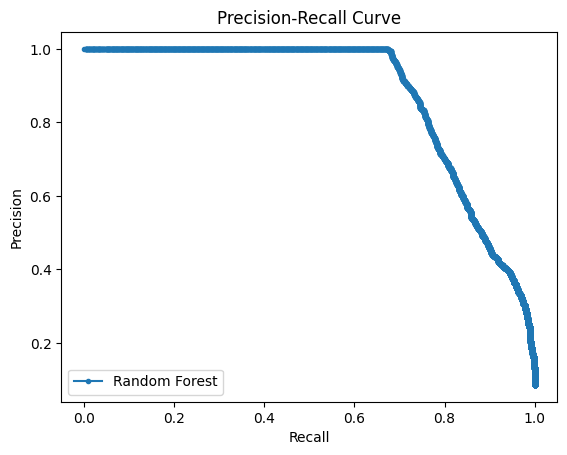

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

# Predict on test data
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Classification report
print(classification_report(y_test, y_pred))

# AUC-ROC Score
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob)}")

# Precision-Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall Curve
plt.plot(recalls, precisions, marker='.', label="Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Find the best threshold to balance precision and recall
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

print(f"Best Threshold: {best_threshold}")
print(f"Precision at Best Threshold: {precisions[best_threshold_index]}")
print(f"Recall at Best Threshold: {recalls[best_threshold_index]}")

# Apply best threshold
y_pred_optimal = (y_prob >= best_threshold).astype(int)

# Evaluate again with the optimal threshold
print(classification_report(y_test, y_pred_optimal))

Best Threshold: 0.8406963185726919
Precision at Best Threshold: 0.994017094017094
Recall at Best Threshold: 0.6809133489461359
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



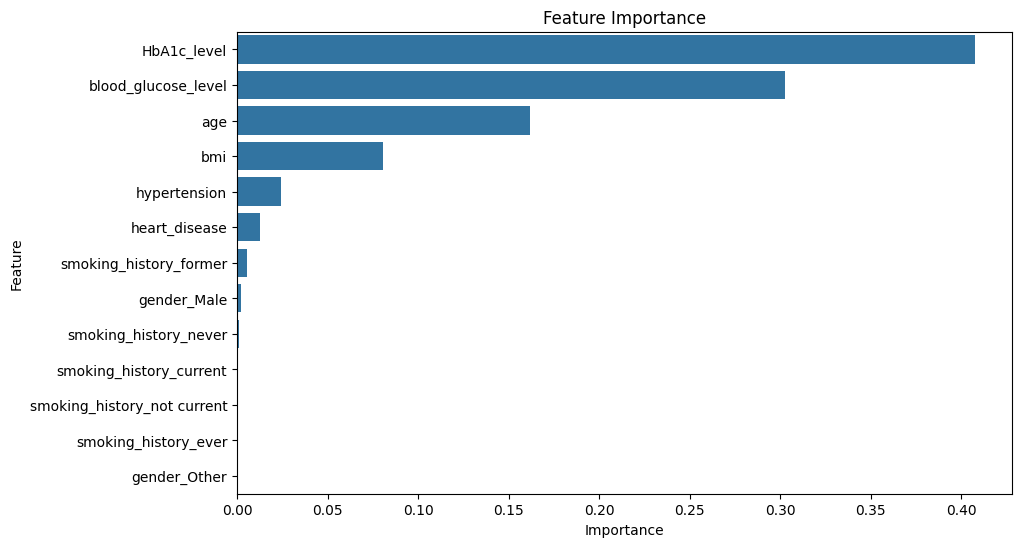

In [ ]:
import seaborn as sns

# Feature importance from the Random Forest model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

Gradient Boosting Models

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = "diabetes_prediction_dataset.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['gender', 'smoking_history'], drop_first=True)

# Normalize numerical features
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# Define features (X) and target (y)
X = data.drop(columns=['diabetes'])
y = data['diabetes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize and train XGBoost
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=10, scale_pos_weight=10, random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Performance metrics
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"XGBoost AUC-ROC: {roc_auc_score(y_test, y_prob_xgb)}")


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     18292
           1       0.47      0.89      0.62      1708

    accuracy                           0.91     20000
   macro avg       0.73      0.90      0.78     20000
weighted avg       0.94      0.91      0.92     20000

XGBoost AUC-ROC: 0.9747781052210024


In [ ]:
from lightgbm import LGBMClassifier

# Initialize and train LightGBM
lgbm_model = LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=10, class_weight='balanced', random_state=42)
lgbm_model.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_lgbm = lgbm_model.predict(X_test)
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

# Performance metrics
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))
print(f"LightGBM AUC-ROC: {roc_auc_score(y_test, y_prob_lgbm)}")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 73208, number of negative: 73208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 146416, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.71      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000

LightGBM AUC-ROC: 0.9780447685503599


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

# Initialize and train CatBoost
catboost_model = CatBoostClassifier(iterations=300, learning_rate=0.05, depth=10, class_weights=[1, 10], random_seed=42, verbose=0)
catboost_model.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_catboost = catboost_model.predict(X_test)
y_prob_catboost = catboost_model.predict_proba(X_test)[:, 1]

# Performance metrics
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_catboost))
print(f"CatBoost AUC-ROC: {roc_auc_score(y_test, y_prob_catboost)}")

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     18292
           1       0.42      0.94      0.58      1708

    accuracy                           0.89     20000
   macro avg       0.71      0.91      0.76     20000
weighted avg       0.94      0.89      0.90     20000

CatBoost AUC-ROC: 0.9777589261068557


In [ ]:
# Create a comparison table
results = {
    "Model": ["XGBoost", "LightGBM", "CatBoost"],
    "AUC-ROC": [
        roc_auc_score(y_test, y_prob_xgb),
        roc_auc_score(y_test, y_prob_lgbm),
        roc_auc_score(y_test, y_prob_catboost)
    ]
}

results_df = pd.DataFrame(results)
print(results_df.sort_values(by="AUC-ROC", ascending=False))

      Model   AUC-ROC
1  LightGBM  0.978045
2  CatBoost  0.977759
0   XGBoost  0.974778


In [ ]:
!pip install --upgrade xgboost scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 96.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
!pip show xgboost scikit-learn

Name: xgboost
Version: 2.1.3
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, nvidia-nccl-cu12, scipy
Required-by: 
---
Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License
         
         Copyright (c) 2007-2024 The scikit-learn developers.
         All rights reserved.
         
         Redistribution and use in source and binary forms, with or without
         modification, are permitted provided that the following conditions are met:
         
         * Redistributions of source code must retain the above copyright notice, this
           list of conditions and the following disclaimer.
         
         * Redistributions in binary form must reproduce the abov

In [ ]:
!pip install xgboost lightgbm catboost

In [ ]:
!pip uninstall xgboost scikit-learn -y
!pip install xgboost scikit-learn


Found existing installation: xgboost 2.1.3
Uninstalling xgboost-2.1.3:
  Successfully uninstalled xgboost-2.1.3
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
  Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.5 MB/s eta 0:00:00
Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialize XGBoost classifier with example parameters
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=10,
    scale_pos_weight=10,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train model
xgb_model.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:04:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.99      0.91      0.95     18292
           1       0.47      0.89      0.62      1708

    accuracy                           0.91     20000
   macro avg       0.73      0.90      0.78     20000
weighted avg       0.94      0.91      0.92     20000

